<a href="https://colab.research.google.com/github/InGev007/startup_acd/blob/main/lesson38/lesson38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

На основі файлу banking.csv, що міститься в репозиторії лекції, виконайте наступні дії:
1. Сформуйте тестовий та тренувальний датасети (розмір тестової вибірки 0.3)
2. Застосуйте логістичну регресію для прогнозування цільової метрики y (ймовірність того, що клієнт відкриє вклад у банку) 
3. Оцініть модель за допомогою матриці похибок, метрик precision, recall, F1-score. Побудуйте AUC-ROC криву для моделі.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv("/content/drive/MyDrive/banking.csv")

numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
data = data[numeric_cols]
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [11]:
X = data.drop(["y"], axis=1)
y = data["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Прогнозування цільової метрики y (ймовірність того, що клієнт відкриє вклад у банку)

In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Будуемо матрицю похибок та метрики precision, recall, F1-score з бібліотеки scikit-learn:

Precision: 0.63
Recall: 0.40
F1-score: 0.49


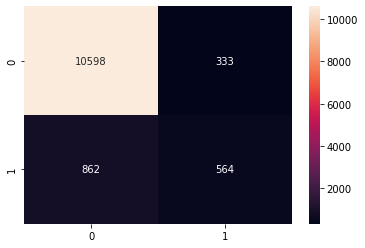

In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns


confusion_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, fmt='g')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Будуемо AUC-ROC криву за допомогою бібліотеки scikit-learn

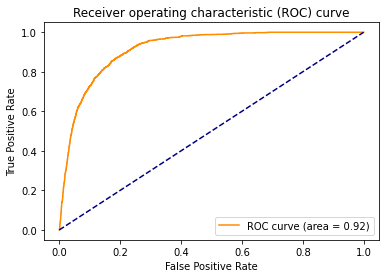

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()